## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* **Apply a distortion correction to raw images.**
* **Use color transforms, gradients, etc., to create a thresholded binary image.**
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

## Apply a distortion correction to raw images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

parameters = pickle.load(open('./camera_calibration_parameters', 'rb'))
mtx, dist = map(parameters.get, ('mtx', 'dist'))

In [2]:
# undistort image
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

Text(0.5, 1.0, 'undistort')

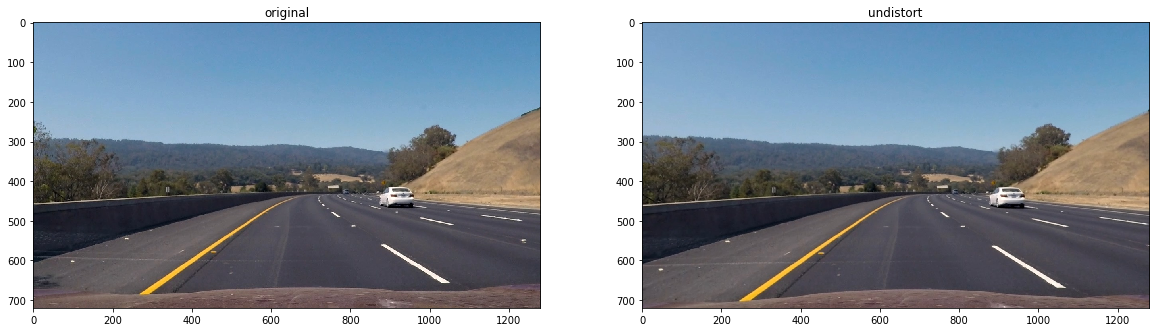

In [3]:
example_image = cv2.imread('../test_images/test3.jpg')
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)
example_undistorted_image = undistort(example_image)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(example_image)
ax1.set_title('original')
ax2.imshow(example_undistorted_image)
ax2.set_title('undistort')

## color transform

Text(0.5, 1.0, 'S')

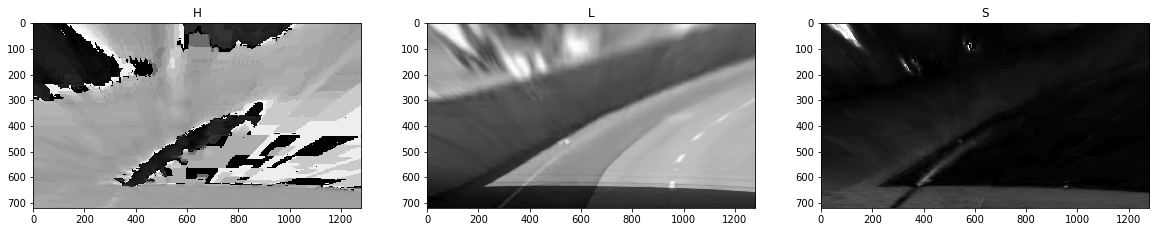

In [23]:
img = cv2.imread("../output_images/process/01_undistort_warped_img.jpg")
hls_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(hls_image[:, :, 0], cmap='gray')
ax1.set_title('H')
ax2.imshow(hls_image[:, :, 1], cmap='gray')
ax2.set_title('L')
ax3.imshow(hls_image[:, :, 2], cmap='gray')
ax3.set_title('S')

Text(0.5, 1.0, 'B')

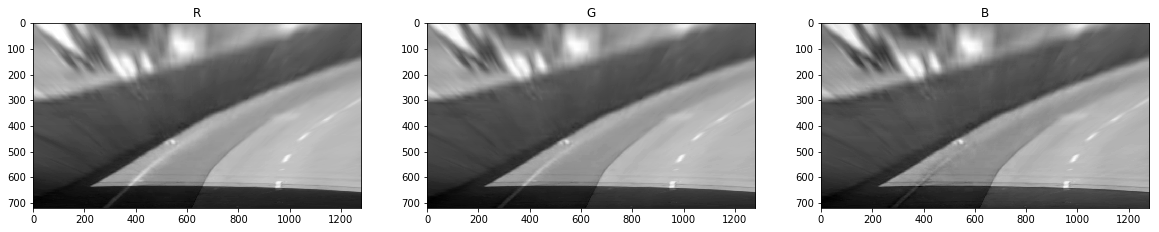

In [22]:
img = cv2.imread("../output_images/process/01_undistort_warped_img.jpg")
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(rgb_image[:, :, 0], cmap='gray')
ax1.set_title('R')
ax2.imshow(rgb_image[:, :, 1], cmap='gray')
ax2.set_title('G')
ax3.imshow(rgb_image[:, :, 2], cmap='gray')
ax3.set_title('B')

[[147 150 155 ... 119 119 119]
 [144 146 151 ... 119 119 119]
 [141 143 147 ... 119 119 119]
 ...
 [ 42  42  42 ...  82  82  82]
 [ 41  41  41 ...  81  81  81]
 [ 39  39  39 ...  81  81  81]]


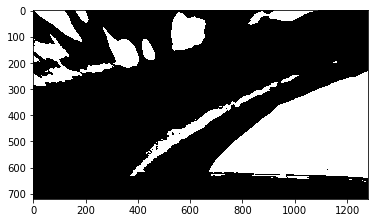

In [20]:
print(rgb_image[:, :, 2])
thresh_min = 180
thresh_max = 255
b_image = rgb_image[:,:,0]
b = np.zeros_like(b_image)
b[(b_image >= thresh_min) & (b_image <= thresh_max)] = 1
plt.imshow(b, cmap='gray')

We can find lane lines clearly in the s channel image.

In [5]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    scaled_sobel = 0
    if orient == 'x':
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    elif orient == 'y':
        scaled_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    binary_output = np.copy(sxbinary)
    return binary_output

In [6]:
def space_thresh(img, thresh_min, thresh_max):
    binary = np.zeros_like(img)
    binary[(img >= thresh_min) & (img <= thresh_max)] = 1
    return binary

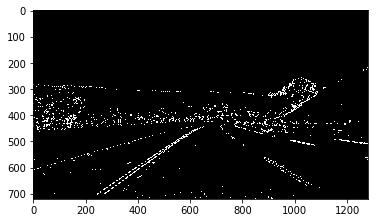

In [13]:
sobelx_img = abs_sobel_thresh(example_undistorted_image, 'x', 20, 80)
plt.imshow(sobelx_img, cmap='gray')
#sobely_img = abs_sobel_thresh(example_undistorted_image, 'y', 10, 160)

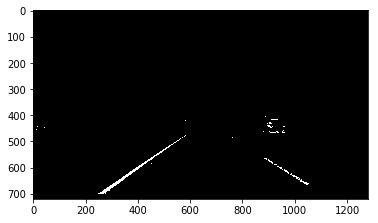

In [14]:
s_binary = space_thresh(hls_image[:, :, 2], 170, 255)
plt.imshow(s_binary, cmap='gray')

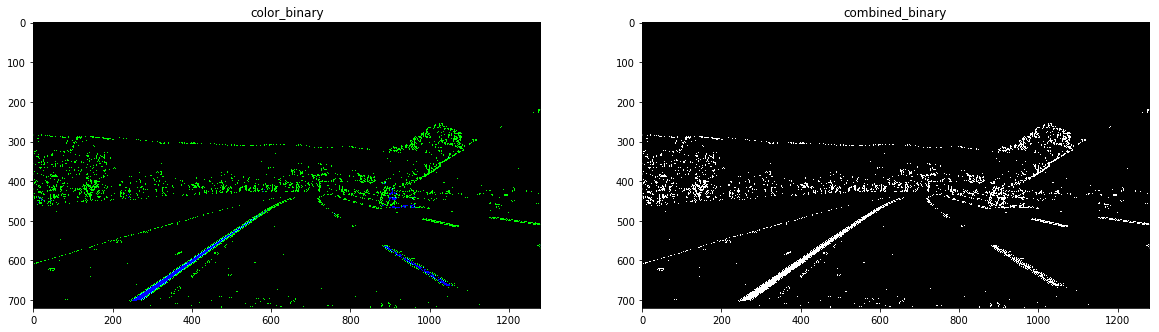

In [16]:
color_binary = np.dstack( ( np.zeros_like(sobelx_img), sobelx_img, s_binary)) * 255
combined_binary = np.zeros_like(sobelx_img)
combined_binary[(sobelx_img == 1) | (s_binary== 1)] = 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(color_binary)
ax1.set_title('color_binary')
ax2.imshow(combined_binary, cmap='gray')
ax2.set_title('combined_binary')
plt.savefig('binary_combo.jpg')